# Predictive Maintenance using Neural Networks with PyTorch

**Dataset**: AI4I 2020 Predictive Maintenance Dataset

---

## **Index**

1. [Introduction](#1)
2. [Import Libraries](#2)
3. [Load the Dataset](#3)
4. [Exploratory Data Analysis (EDA)](#4)
   - 4.1 [Overview of the Dataset](#4.1)
   - 4.2 [Check for Missing Values](#4.2)
   - 4.3 [Statistical Summary](#4.3)
   - 4.4 [Target Variable Distribution](#4.4)
   - 4.5 [Visualizations](#4.5)
5. [Data Preprocessing](#5)
   - 5.1 [Drop Unnecessary Columns](#5.2)
   - 5.2 [Drop 'Type' Column](#5.3)
   - 5.3 [Feature and Target Separation](#5.4)
6. [Split the Data into Training and Testing Sets](#6)
7. [Balancing the Training Data](#7)
8. [Feature Scaling](#8)
9. [Principal Component Analysis (PCA)](#9)
10. [Prepare Data for PyTorch](#10)
11. [Implementing a Perceptron Model](#11)
12. [Define the Neural Network](#12)
13. [Train the Neural Network](#13)
14. [Final Evaluation](#14)
15. [Prediction Functionality with Widgets](#15)


---

<a id="1"></a>
## **1. Introduction**

Predictive maintenance is used to prevent equipment failures and reduce downtime.

We will:

- Perform exploratory data analysis (EDA).
- Preprocess the data, including handling class imbalance.
- Implement both a perceptron model and a more complex neural network.
- Explain key neural network concepts in detail, focusing on matrix manipulations.
- Add prediction functionality with interactive widgets.
- Evaluate the models' performance.

---

<a id="2"></a>
## **2. Import Libraries**

First, we need to import the necessary libraries for data manipulation, visualization, machine learning, and building neural networks with PyTorch.

In [1]:
# Install imbalanced-learn for handling imbalanced datasets
!pip install imbalanced-learn
!pip install ipywidgets

# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Balancing the dataset
from imblearn.over_sampling import SMOTE

# PyTorch for neural network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Widgets for interactive inputs
import ipywidgets as widgets
from IPython.display import display

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id="3"></a>
## **3. Load the Dataset**

We need to load the AI4I 2020 Predictive Maintenance Dataset into a pandas DataFrame.

In [13]:
# Mount Google Drive (if using Google Colab)
#from google.colab import drive
#drive.mount('/content/ai4i2020.csv')

#Define the path to the dataset in Google Drive
#data_path = 'ai4i2020.csv'
data_path = './ai4i2020.csv'
data = pd.read_csv(data_path)

# Display the first five rows
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


---

<a id="4"></a>
## **4. Exploratory Data Analysis (EDA)**

Exploratory data analysis helps us understand the dataset's structure, identify patterns, and detect anomalies.

<a id="4.1"></a>
### **4.1. Overview of the Dataset**

In [14]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

<a id="4.2"></a>
### **4.2. Check for Missing Values**

In [15]:
# Check for missing values in each column
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Since there are no missing values, we can proceed.

<a id="4.3"></a>
### **4.3. Statistical Summary**

In [39]:
# Statistical summary of numerical features
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<a id="4.4"></a>
### **4.4. Target Variable Distribution**

In [17]:
#Review Type field
print("Type distribution:")
print(data['Type'].value_counts())

# Sum of each failure type
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
print("Failure type distribution:")
print(data[failure_types].sum())

Type distribution:
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Failure type distribution:
TWF     46
HDF    115
PWF     95
OSF     98
RNF     19
dtype: int64


Given that we have less than 50 samples per failure:

```
TWF     46
HDF    115
PWF     95
OSF     98
RNF     19
```

We will move to train the neural network with the column **'Machine failure'** as the target variable. This approach simplifies the problem to a binary classification task, predicting whether a machine will fail or not, regardless of the failure type.

<a id="4.5"></a>
### **4.5. Visualizations**

#### **Histograms of Numerical Features**

Machine failure distribution
Machine failure
0    9661
1     339
Name: count, dtype: int64


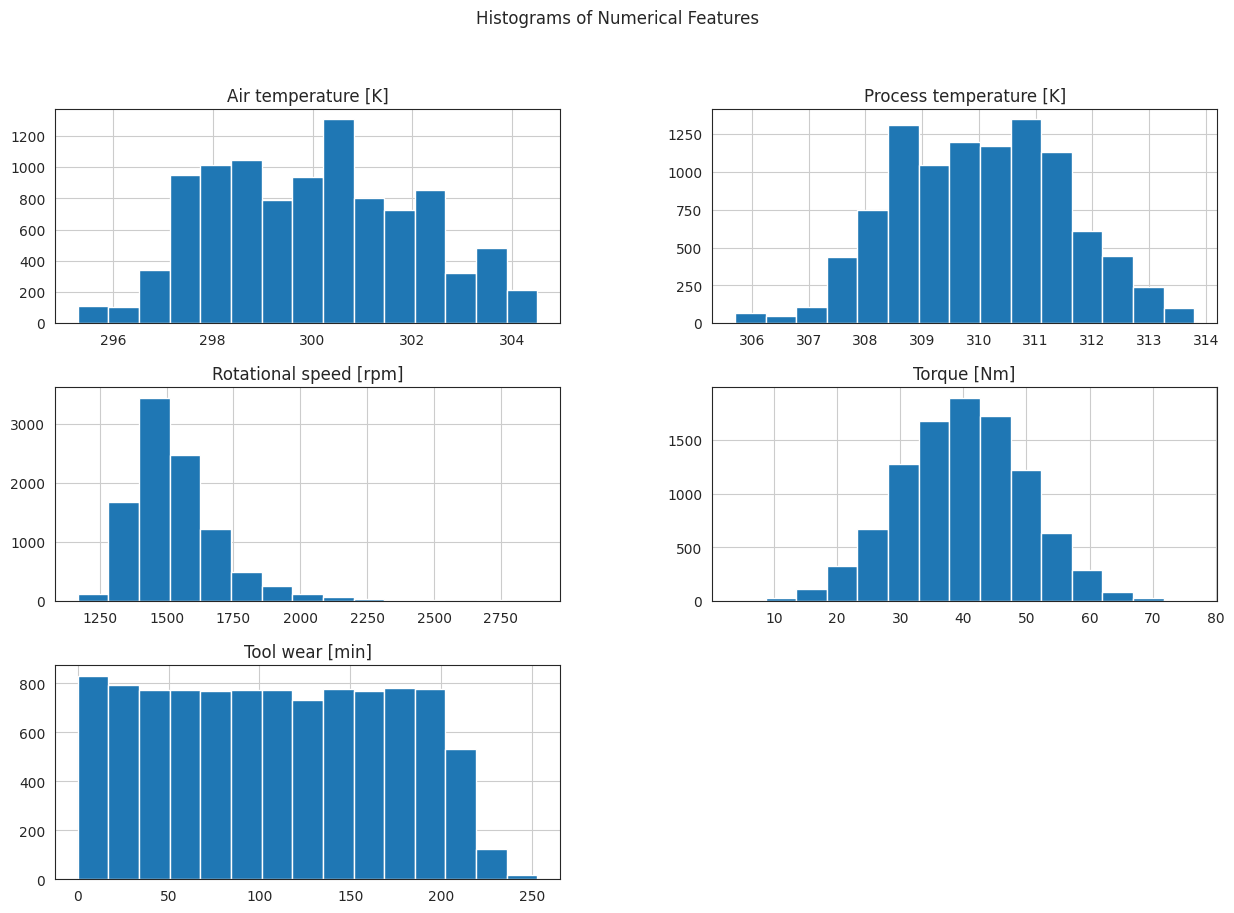

In [41]:
#'Machine failure'  distribution:
print('Machine failure distribution')
print(data['Machine failure'].value_counts())
# List of numerical columns
num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
            'Torque [Nm]', 'Tool wear [min]']

# Plot histograms
data[num_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

---

<a id="5"></a>
## **5. Data Preprocessing**

Data preprocessing is essential to prepare the data for modeling. It includes cleaning the data, handling missing values, encoding categorical variables, and feature scaling.

<a id="5.2"></a>
### **5.1. Drop Unnecessary Columns**

We remove columns that are not useful for modeling. 'UDI' and 'Product ID' are unique identifiers and do not contribute to the predictive power of the model.

In [18]:
# Drop 'UDI' and 'Product ID' as they are unique identifiers and not useful for modeling
data = data.drop(['UDI', 'Product ID'], axis=1)

#Drop type because L is a majority class with more than

<a id="5.3"></a>
### **5.2. Drop 'Type' Column**

Delete Type because
L    with 6000 records is the 60% of the data
M    2997
H    1003.

In [19]:
# delete the Type column
data = data.drop(['Type'], axis = 1)

<a id="5.4"></a>
### **5.3. Feature and Target Separation**

We separate the dataset into features (input variables) and the target variable. In this case, the target is 'Machine failure'.

In [20]:
# Features (exclude 'Machine failure' and failure type columns)
X = data.drop(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)

# Target variable ('Machine failure')
y = data['Machine failure']

---

<a id="6"></a>
## **6. Split the Data into Training and Testing Sets**

Splitting the data into training and testing sets is a crucial step in machine learning. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data.

By doing this, we can assess how well the model generalizes to new data. Without a separate testing set, we risk overfitting the model to the training data, leading to poor performance in real-world scenarios.

In [21]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 8000 samples
Testing set size: 2000 samples


---

<a id="7"></a>
## **7. Balancing the Training Data**

Class imbalance occurs when the number of instances of one class significantly exceeds those of other classes. In our dataset, machine failures are rare compared to normal operations.

Balancing the dataset is important because machine learning models can become biased towards the majority class, leading to poor performance in predicting minority classes. We use **Synthetic Minority Over-sampling Technique (SMOTE)** to generate synthetic samples of the minority class, improving the model's ability to learn from these examples.

In [22]:
# Apply SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE, SVMSMOTE,RandomOverSampler
#oversamp = SVMSMOTE(random_state=0)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution after resampling
print("After resampling:")
print(pd.Series(y_train_resampled).value_counts())

After resampling:
Machine failure
0    7729
1    7729
Name: count, dtype: int64


SMOTE works by creating synthetic examples of the minority class by interpolating between existing minority instances. This approach helps the model to learn the underlying patterns of the minority class better than simply duplicating existing samples.

<a id="8"></a>
## **8. Feature Scaling**

Feature scaling is the process of normalizing the range of features. It is essential because features with larger scales can dominate the learning process, leading to an ineffective model.

We apply **standardization** to rescale our features to have a mean of zero and a standard deviation of one. This ensures that each feature contributes equally to the distance calculations in algorithms like gradient descent.

In [23]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

Standardization helps in faster convergence during training and can improve the overall performance of the neural network.

---

<a id="9"></a>
## **9. Principal Component Analysis (PCA)**

PCA is a dimensionality reduction technique that transforms the data into a lower-dimensional space while retaining as much variance as possible. Reducing the number of features can help improve model performance and reduce computational complexity.
Video: https://www.youtube.com/watch?v=g-Hb26agBFg&list=PLYZvFlkrlPewda1aLJQUR5jQfO1owUTm5&index=1

In [24]:
# # Initialize PCA to reduce to 5 components
pca = PCA(n_components=5)

# # Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# # Transform the test data
X_test_pca = pca.transform(X_test_scaled)

# # Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# # Total variance explained
print("Total variance explained:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.40137009 0.3457151  0.1955404  0.03029468 0.02707973]
Total variance explained: 1.0


PCA reduces the number of features from 9 to 5, capturing the majority of the variance in the data.

<a id="10"></a>
## **10. Prepare Data for PyTorch**

To train our model using PyTorch, we need to convert our data into tensors and create data loaders. Data loaders help in batching and shuffling the data during training.

In [25]:
# Convert training data to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32)

# Convert test data to tensors
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)

Data loaders are essential in handling large datasets by breaking them into manageable batches. Shuffling ensures that the model doesn't learn the order of the data, which can introduce bias.

---

<a id="11"></a>
## **11. Implementing a Perceptron Model**

Before diving into a complex neural network, it's helpful to start with a simpler model like a **perceptron**. A perceptron is a single-layer neural network used for binary classification tasks.

Implementing a perceptron allows us to understand the basics of neural networks, such as how weights are updated during training and how the activation function works.
Video: https://www.youtube.com/watch?v=BR9h47Jtqyw&list=PLYZvFlkrlPewda1aLJQUR5jQfO1owUTm5&index=17

In [26]:
# Define the perceptron model
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        out = self.linear(x)
        return out

# Initialize model, loss function, optimizer
input_size = X_train_tensor.shape[1]
model_perceptron = Perceptron(input_size)

# Move model to device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_perceptron.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device )

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model_perceptron.parameters(), lr=0.01)

**Inheritance from `nn.Module`**:

By inheriting from `nn.Module`, our `Perceptron` class gains the functionality needed to define and train a neural network in PyTorch. This includes methods for tracking model parameters and moving the model to different devices (CPU/GPU).

**Calculating Number of Weights**:

In a perceptron with `n` input features and 1 output, the number of weights is `n + 1` (including the bias term). For example, if `n = 5`, then we have 6 weights.

**Perceptron Explanation**:

A perceptron consists of a single linear layer that maps input features to an output. It uses an activation function (in this case, the sigmoid function applied via `BCEWithLogitsLoss`) to produce probabilities. The perceptron learns weights that minimize the loss function through gradient descent.

Using a simple model like a perceptron helps in understanding the core concepts of neural networks without the complexity of multiple layers and non-linear activations.

**Forward Propagation with Matrices**:

In forward propagation, the input data (matrix **X**) is multiplied by the weight matrix **W** and added to the bias **b** to produce the output **Y_pred**:

\[ Y_{pred} = XW + b \]

Here, **X** is of shape (batch_size, input_size), **W** is of shape (input_size, 1), and **b** is a scalar. The result is a tensor of shape (batch_size, 1). This operation is a matrix multiplication followed by a bias addition.

**Gradient Descent with Matrices**:

During backpropagation, we compute the gradient of the loss function with respect to the weights **W** and bias **b**. These gradients are matrices/tensors of the same shape as **W** and **b**. The weights and biases are then updated using the gradients:

\[ W = W - \eta \frac{\partial L}{\partial W} \]
\[ b = b - \eta \frac{\partial L}{\partial b} \]

Where:
- \( \eta \) is the learning rate.
- \( \frac{\partial L}{\partial W} \) is the gradient of the loss with respect to **W**.
- \( \frac{\partial L}{\partial b} \) is the gradient of the loss with respect to **b**.



**

The loss.backward() call initiates the backward pass, where PyTorch computes the gradients of the loss with respect to each model parameter through backpropagation. This process involves:

Computational Graph Traversal: PyTorch keeps track of the operations performed during the forward pass, building a computational graph.
Chain Rule Application: The backward pass computes derivatives using the chain rule, moving from the output layer back to the input layer.
Gradient Storage: The computed gradients are stored in the .grad attribute of each parameter tensor.

In [27]:
# Training the perceptron model
epochs = 20

for epoch in range(epochs):
    model_perceptron.train()
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device).unsqueeze(1)

        optimizer.zero_grad() #Reset the gradients to zero for the next batch.
        outputs = model_perceptron(X_batch) #Forward propagation
        loss = criterion(outputs, y_batch)  #Compute loss
        loss.backward() #Backward propagation
        optimizer.step() #Update the weights

    # Evaluate on the test set
    model_perceptron.eval()
    with torch.no_grad():
        outputs = model_perceptron(X_test_tensor)
        predictions = torch.sigmoid(outputs) > 0.5
        precision = precision_score(y_test_tensor.cpu(), predictions.cpu())

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Precision: {precision:.4f}")

Epoch 1/20, Loss: 0.7171, Precision: 0.1250
Epoch 2/20, Loss: 0.6970, Precision: 0.1567
Epoch 3/20, Loss: 0.6683, Precision: 0.1655
Epoch 4/20, Loss: 0.6661, Precision: 0.1677
Epoch 5/20, Loss: 0.6731, Precision: 0.1775
Epoch 6/20, Loss: 0.6637, Precision: 0.1844
Epoch 7/20, Loss: 0.6558, Precision: 0.1717
Epoch 8/20, Loss: 0.6455, Precision: 0.1620
Epoch 9/20, Loss: 0.6463, Precision: 0.1504
Epoch 10/20, Loss: 0.6102, Precision: 0.1496
Epoch 11/20, Loss: 0.6257, Precision: 0.1376
Epoch 12/20, Loss: 0.6146, Precision: 0.1350
Epoch 13/20, Loss: 0.6296, Precision: 0.1246
Epoch 14/20, Loss: 0.6272, Precision: 0.1225
Epoch 15/20, Loss: 0.6176, Precision: 0.1212
Epoch 16/20, Loss: 0.6270, Precision: 0.1181
Epoch 17/20, Loss: 0.5986, Precision: 0.1170
Epoch 18/20, Loss: 0.5964, Precision: 0.1144
Epoch 19/20, Loss: 0.5915, Precision: 0.1165
Epoch 20/20, Loss: 0.5939, Precision: 0.1135


**Forward Propagation**:

- **Matrix Multiplication**: Input features are multiplied by weights.
- **Activation Function**: Applies a non-linear function to introduce non-linearity.

**Backward Propagation**:

- **Compute Gradients**: Calculate the gradient of the loss function with respect to each weight and bias.
- **Update Weights**: Adjust weights in the opposite direction of the gradient to minimize the loss.

**Gradient Descent**:

An optimization algorithm that iteratively updates parameters to minimize a loss function. In each iteration, we update the parameters using the gradients calculated during backpropagation.

---

<a id="12"></a>
## **12. Define the Neural Network**

Now, we'll implement a more complex neural network. This network includes multiple layers, non-linear activation functions, and dropout regularization to prevent overfitting.

**Why Use a Neural Network?**

A neural network can capture complex non-linear relationships in the data, which a simple perceptron might miss. By adding hidden layers and non-linear activation functions, the model can learn intricate patterns, improving its predictive performance.
Video: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.46276&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [28]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size  , 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64 ),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0,2 ),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)

### **Calculating Number of Weights in the Neural Network**

The total number of weights and biases in the network is the sum of weights and biases in each layer, including parameters from Batch Normalization layers:

- **First Layer (Input to Hidden 1)**:
  - **Weights**: `input_size * 128`
  - **Biases**: `128`
- **First BatchNorm Layer**:
  - **Parameters**:
    - Scale (γ): `128`
    - Shift (β): `128`
    - **Total**: `128 + 128 = 256`
- **Second Layer (Hidden 1 to Hidden 2)**:
  - **Weights**: `128 * 64`
  - **Biases**: `64`
- **Second BatchNorm Layer**:
  - **Parameters**:
    - Scale (γ): `64`
    - Shift (β): `64`
    - **Total**: `64 + 64 = 128`
- **Third Layer (Hidden 2 to Hidden 3)**:
  - **Weights**: `64 * 32`
  - **Biases**: `32`
- **Third BatchNorm Layer**:
  - **Parameters**:
    - Scale (γ): `32`
    - Shift (β): `32`
    - **Total**: `32 + 32 = 64`
- **Output Layer (Hidden 3 to Output)**:
  - **Weights**: `32 * 1 = 32`
  - **Biases**: `1`

**Total Weights and Biases**:

\[
\begin{align*}
\text{Total Parameters} &= \left( \text{Input Layer Parameters} \right) + \left( \text{First BatchNorm Parameters} \right) + \left( \text{Second Layer Parameters} \right) \\
&\quad + \left( \text{Second BatchNorm Parameters} \right) + \left( \text{Third Layer Parameters} \right) + \left( \text{Third BatchNorm Parameters} \right) + \left( \text{Output Layer Parameters} \right) \\
&= \left( ( \text{input\_size} \times 128 ) + 128 \right) + 256 + \left( (128 \times 64) + 64 \right) \\
&\quad + 128 + \left( (64 \times 32) + 32 \right) + 64 + (32 + 1)
\end{align*}
\]

Calculating constants:

- First Layer: `input_size * 128 + 128`
- First BatchNorm: `256`
- Second Layer: `8192 + 64 = 8256`
- Second BatchNorm: `128`
- Third Layer: `2048 + 32 = 2080`
- Third BatchNorm: `64`
- Output Layer: `32 + 1 = 33`

**Total Parameters**:

\[
\text{Total Parameters} = (\text{input\_size} \times 128) + 128 + 256 + 8256 + 128 + 2080 + 64 + 33
\]

Adding up the constants:

\[
\begin{align*}
\text{Constants Sum} &= 128 + 256 + 8256 + 128 + 2080 + 64 + 33 \\
&= 128 + 256 = 384 \\
&384 + 8256 = 8640 \\
&8640 + 128 = 8768 \\
&8768 + 2080 = 10848 \\
&10848 + 64 = 10912 \\
&10912 + 33 = 10945
\end{align*}
\]

**Final Total Parameters**:

\[
\text{Total Parameters} = (\text{input\_size} \times 128) + 10945
\]

This calculation helps in understanding the model's capacity and computational requirements. The number of parameters impacts the model's ability to learn complex patterns but also affects training time and risk of overfitting.

---

### **Forward Propagation with Matrices**

In this neural network, forward propagation involves multiple matrix multiplications, batch normalization, activations, and dropout:

1. **Layer 1**:
   \[
   \begin{align*}
   Z_1 &= X W_1 + b_1 \\
   \hat{Z}_1 &= \text{BatchNorm}(Z_1) \\
   H_1 &= \text{ReLU}(\hat{Z}_1) \\
   H_1^{\text{drop}} &= \text{Dropout}(H_1)
   \end{align*}
   \]
2. **Layer 2**:
   \[
   \begin{align*}
   Z_2 &= H_1^{\text{drop}} W_2 + b_2 \\
   \hat{Z}_2 &= \text{BatchNorm}(Z_2) \\
   H_2 &= \text{ReLU}(\hat{Z}_2) \\
   H_2^{\text{drop}} &= \text{Dropout}(H_2)
   \end{align*}
   \]
3. **Layer 3**:
   \[
   \begin{align*}
   Z_3 &= H_2^{\text{drop}} W_3 + b_3 \\
   \hat{Z}_3 &= \text{BatchNorm}(Z_3) \\
   H_3 &= \text{ReLU}(\hat{Z}_3) \\
   H_3^{\text{drop}} &= \text{Dropout}(H_3)
   \end{align*}
   \]
4. **Output Layer**:
   \[
   Y_{\text{pred}} = H_3^{\text{drop}} W_4 + b_4
   \]

- **\( X \)**: Input matrix.
- **\( W \)**: Weight matrices.
- **\( b \)**: Bias vectors.
- **BatchNorm**: Batch Normalization operation.
- **ReLU**: Activation function applied element-wise.
- **Dropout**: Randomly sets a fraction of inputs to zero during training.

Each layer performs the following operations:

- **Linear Transformation**: \( Z = HW + b \)
- **Batch Normalization**: Normalizes the output of the linear layer.
- **Activation**: Applies ReLU to introduce non-linearity.
- **Dropout**: Randomly drops neurons to prevent overfitting (only during training).

This process allows the network to learn complex, non-linear relationships in the data by transforming inputs through successive layers of computations.

**Forward Propagation with Matrices**:

In this neural network, forward propagation involves multiple matrix multiplications and activations:

1. **Layer 1**: \( H_1 = ReLU(XW_1 + b_1) \)
2. **Layer 2**: \( H_2 = ReLU(H_1W_2 + b_2) \)
3. **Output Layer**: \( Y_{pred} = H_2W_3 + b_3 \)

- **X**: Input matrix.
- **W**: Weight matrices.
- **b**: Bias vectors.
- **ReLU**: Activation function applied element-wise.

Each layer performs a matrix multiplication followed by an addition of the bias vector and an activation function.

Batch Normalization explanation: https://www.youtube.com/watch?v=nUUqwaxLnWs
Relu explanation: https://www.youtube.com/watch?v=68BZ5f7P94E

---

<a id="13"></a>
## **13. Train the Neural Network**

Training the neural network involves the same steps as before but with a more complex model. We'll also use an advanced optimizer.

In [29]:
# Initialize model, loss function, optimizer
input_size = X_train_tensor.shape[1]
model = Net(input_size)
model.to(device)

# Define loss function
criterion = nn.BCEWithLogitsLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
epochs = 100
best_f1 = 0
patience = 20
trigger_times = 0

for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device).unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    # Evaluate on the test set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor.to(device))
        predictions = torch.sigmoid(outputs) > 0.5
        f1 = f1_score(y_test_tensor.cpu(), predictions.cpu())

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, F1 Score: {f1:.4f}")

    # Early stopping based on F1 Score
    if f1 > best_f1:
        best_f1 = f1
        trigger_times = 0
        # Save the best model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print('Early stopping!')
            break

Epoch 1/100, Loss: 0.4404, F1 Score: 0.2206
Epoch 2/100, Loss: 0.3564, F1 Score: 0.2837
Epoch 3/100, Loss: 0.3084, F1 Score: 0.2977
Epoch 4/100, Loss: 0.3188, F1 Score: 0.3249
Epoch 5/100, Loss: 0.2530, F1 Score: 0.3307
Epoch 6/100, Loss: 0.2602, F1 Score: 0.3590
Epoch 7/100, Loss: 0.2988, F1 Score: 0.3631
Epoch 8/100, Loss: 0.2640, F1 Score: 0.3563
Epoch 9/100, Loss: 0.2179, F1 Score: 0.3865
Epoch 10/100, Loss: 0.2167, F1 Score: 0.3853
Epoch 11/100, Loss: 0.2264, F1 Score: 0.3580
Epoch 12/100, Loss: 0.2411, F1 Score: 0.3913
Epoch 13/100, Loss: 0.1917, F1 Score: 0.3841
Epoch 14/100, Loss: 0.2493, F1 Score: 0.3708
Epoch 15/100, Loss: 0.2094, F1 Score: 0.3663
Epoch 16/100, Loss: 0.2156, F1 Score: 0.3924
Epoch 17/100, Loss: 0.1927, F1 Score: 0.3887
Epoch 18/100, Loss: 0.2008, F1 Score: 0.3987
Epoch 19/100, Loss: 0.2423, F1 Score: 0.3792
Epoch 20/100, Loss: 0.1983, F1 Score: 0.3873
Epoch 21/100, Loss: 0.2003, F1 Score: 0.3863
Epoch 22/100, Loss: 0.1966, F1 Score: 0.3974
Epoch 23/100, Loss:

**Loss Function Explanation**:

The **loss function** measures the difference between the predicted outputs and the true labels. In binary classification, `BCEWithLogitsLoss` combines a sigmoid layer and binary cross-entropy loss in one class. It is suitable for models that output raw scores (logits).

**Optimizer Explanation**:

An **optimizer** updates the model parameters to minimize the loss function. We use **Adam**, an adaptive learning rate optimizer that combines the advantages of two other extensions of stochastic gradient descent: AdaGrad and RMSProp. It computes individual adaptive learning rates for different parameters.

**Gradient Descent with Matrices**:

In backpropagation, gradients are computed for each layer's weights and biases. These gradients are matrices/tensors that are used to update the weights:

\[ W = W - \eta \frac{\partial L}{\partial W} \]
\[ b = b - \eta \frac{\partial L}{\partial b} \]

For each layer, the gradient of the loss with respect to its weights and biases is calculated using the chain rule, considering the gradients from subsequent layers.

This process allows the network to adjust all weights and biases to minimize the overall loss function.

---

<a id="14"></a>
## **14. Final Evaluation**

After training, we evaluate the model's performance on the test set using various metrics.

Test Accuracy: 0.9220
Precision: 0.2885
Recall: 0.8824
F1 Score: 0.4348

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      1932
         1.0       0.29      0.88      0.43        68

    accuracy                           0.92      2000
   macro avg       0.64      0.90      0.70      2000
weighted avg       0.97      0.92      0.94      2000



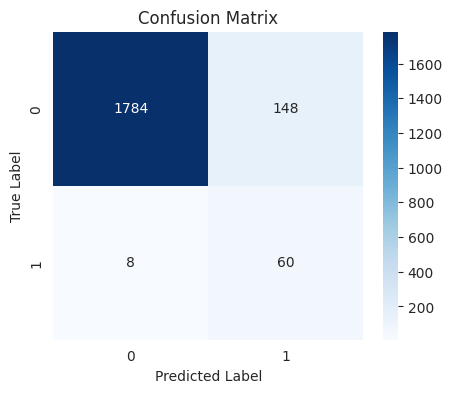

In [54]:
# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor.to(device))
    predictions = torch.sigmoid(outputs) > 0.5
    accuracy = accuracy_score(y_test_tensor.cpu(), predictions.cpu())
    precision = precision_score(y_test_tensor.cpu(), predictions.cpu())
    recall = recall_score(y_test_tensor.cpu(), predictions.cpu())
    f1 = f1_score(y_test_tensor.cpu(), predictions.cpu())

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_tensor.cpu(), predictions.cpu()))

# Compute confusion matrix
cm = confusion_matrix (y_test_tensor.cpu(), predictions.cpu())

# Plot confusion matrix
sns.set_style('white')
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The **classification report** provides detailed metrics like precision, recall, and F1 score, which are essential for evaluating classification models, especially in imbalanced datasets.

- **Precision**: The ratio of true positives to the sum of true and false positives. It measures the model's accuracy in predicting positive instances.
- **Recall**: The ratio of true positives to the sum of true positives and false negatives. It measures the model's ability to find all positive instances.
- **F1 Score**: The harmonic mean of precision and recall. It provides a balance between the two metrics.

---

<a id="15"></a>
## **15. Prediction Functionality with Widgets**

To make our model interactive, we'll create widgets that allow users to input new data and get predictions.

In [56]:
# Define input widgets
air_temp_widget = widgets.FloatSlider(value=300, min=295, max=305, step=0.1, description='Air Temp [K]:')
process_temp_widget = widgets.FloatSlider(value=310, min=305, max=315, step=0.1, description='Process Temp [K]:')
rot_speed_widget = widgets.IntSlider(value=1500, min=1000, max=3000, step=10, description='Rot Speed [rpm]:')
torque_widget = widgets.FloatSlider(value=40, min=0, max=80, step=0.1, description='Torque [Nm]:')
tool_wear_widget = widgets.IntSlider(value=100, min=0, max=250, step=1, description='Tool Wear [min]:')

# Machine type selection
type_widget = widgets.Dropdown(options=['L', 'M', 'H'], value='M', description='Type:')

# Prediction function
def predict_failure(*args):
    # Create a DataFrame from the inputs
    input_data = pd.DataFrame({
        'Air temperature [K]': [air_temp_widget.value],
        'Process temperature [K]': [process_temp_widget.value],
        'Rotational speed [rpm]': [rot_speed_widget.value],
        'Torque [Nm]': [torque_widget.value],
        'Tool wear [min]': [tool_wear_widget.value],
        'Type_H': [1 if type_widget.value == 'H' else 0],
        'Type_L': [1 if type_widget.value == 'L' else 0],
        'Type_M': [1 if type_widget.value == 'M' else 0]
    })

    # Calculate Torque_Over_Speed
    input_data['Torque_Over_Speed'] = input_data['Torque [Nm]'] / (input_data['Rotational speed [rpm]'] + 1e-3)

    # Ensure columns are in the same order as training data
    input_data = input_data[X.columns]

    # Standardize and apply PCA
    input_scaled = scaler.transform(input_data)
    input_tensor = torch.tensor(input_scaled, dtype=torch.float32).to(device)

    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
        prediction = torch.sigmoid(output).item()

    # Display result
    if prediction > 0.5:
        print("High risk of machine failure.")
    else:
        print("Low risk of machine failure.")

# Button to trigger prediction
predict_button = widgets.Button(description="Predict")
predict_button.on_click(predict_failure)

# Display widgets
display(air_temp_widget, process_temp_widget, rot_speed_widget, torque_widget, tool_wear_widget, type_widget, predict_button)

FloatSlider(value=300.0, description='Air Temp [K]:', max=305.0, min=295.0)

FloatSlider(value=310.0, description='Process Temp [K]:', max=315.0, min=305.0)

IntSlider(value=1500, description='Rot Speed [rpm]:', max=3000, min=1000, step=10)

FloatSlider(value=40.0, description='Torque [Nm]:', max=80.0)

IntSlider(value=100, description='Tool Wear [min]:', max=250)

Dropdown(description='Type:', index=1, options=('L', 'M', 'H'), value='M')

Button(description='Predict', style=ButtonStyle())

Low risk of machine failure.


---